## Clustering con Python

### Importar el Dataset

In [53]:
import pandas as pd

In [54]:
df = pd.read_csv("../datasets/wine/winequality-red.csv", sep=";")
df.shape

(1599, 12)

In [55]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

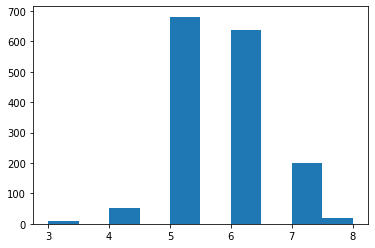

In [56]:
plt.hist(df["quality"])

### La función .groupby(...) agrupa por ese dato

In [57]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Normalización de Datos

In [58]:
df_norm = (df-df.min()) / (df.max()-df.min())

In [59]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


### Clustering jerárquico con scikit-learn

In [60]:
from sklearn.cluster import AgglomerativeClustering

### La función 
* clus = AgglomerativeClustering(n_clusters = n, linkage = method) 

Agrupa los clusters en n cantidad. Además, si usamos la siguiente función, nos arroja los labels de a cuál cluster pertenece cada dato:

* pd.Series(clus.labels_)

In [61]:
clus = AgglomerativeClustering(n_clusters = 6, linkage="ward").fit((df_norm))

In [62]:
md_h = pd.Series(clus.labels_)

Text(0, 0.5, 'Numero de vinos del cluster')

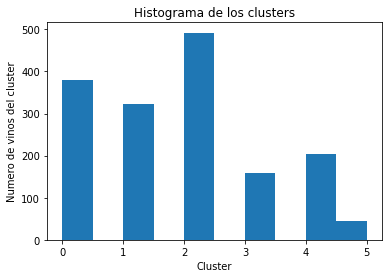

In [63]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Numero de vinos del cluster")

In [64]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [65]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Otro método para usar es el dendrograma, así:

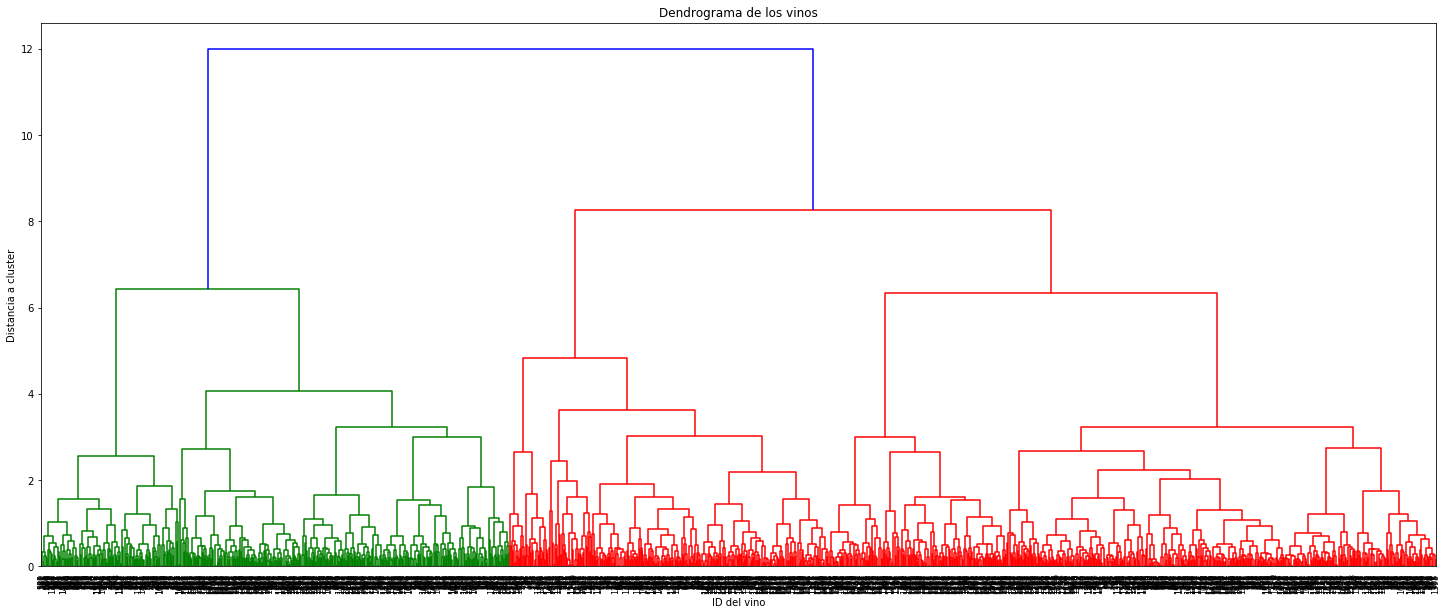

In [66]:
Z = linkage(df_norm,"ward")

plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia a cluster")
dendrogram(Z,leaf_rotation=90., leaf_font_size=8.)
plt.show()

### Ahora hagamos el Cluster con K-Means

In [67]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [84]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [75]:
model.labels_

array([1, 1, 1, ..., 0, 0, 3])

In [85]:
md_k = pd.Series(model.labels_)

In [88]:
df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k

In [89]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,0


(array([492.,   0., 195.,   0., 263.,   0., 328.,   0., 211., 110.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

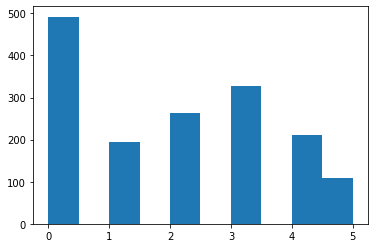

In [86]:
plt.hist(md_k)

#### Los centroides de los clusters se miran así:

In [87]:
model.cluster_centers_

array([[0.26566659, 0.36085589, 0.11735772, 0.09074646, 0.12296239,
        0.15210981, 0.10933954, 0.48824212, 0.48316369, 0.15964413,
        0.22588597, 0.43943089, 2.18292683, 4.02235772],
       [0.56832312, 0.22284861, 0.45871795, 0.12346329, 0.12968623,
        0.1442398 , 0.09160098, 0.64009564, 0.34136887, 0.21618302,
        0.29618672, 0.5774359 , 2.78974359, 0.84615385],
       [0.35758269, 0.1622871 , 0.42022814, 0.10362519, 0.10704152,
        0.15910673, 0.08199761, 0.4130612 , 0.4232508 , 0.22927529,
        0.4765721 , 0.6851711 , 0.01140684, 3.0608365 ],
       [0.31499568, 0.27818034, 0.30557927, 0.15212579, 0.12563622,
        0.3648875 , 0.2908515 , 0.54088768, 0.43993662, 0.17562436,
        0.21330519, 0.46158537, 0.91768293, 4.89939024],
       [0.19095751, 0.33040641, 0.14      , 0.0842693 , 0.15833656,
        0.24444296, 0.13543115, 0.34228657, 0.54203829, 0.24508329,
        0.45773484, 0.57535545, 4.15165877, 0.28909953],
       [0.42872084, 0.2000934 , 0.4

### Para mirar el coeficiente de distancias a los varicentros es:

In [83]:
model.inertia_

749.3223684204432

## Interpretación Final

In [91]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.265667,0.360856,0.117358,0.090746,0.122962,0.152110,0.109340,0.488242,0.483164,0.159644,0.225886,0.439431,2.182927
1,0.568323,0.222849,0.458718,0.123463,0.129686,0.144240,0.091601,0.640096,0.341369,0.216183,0.296187,0.577436,2.789744
2,0.357583,0.162287,0.420228,0.103625,0.107042,0.159107,0.081998,0.413061,0.423251,0.229275,0.476572,0.685171,0.011407
3,0.314996,0.278180,0.305579,0.152126,0.125636,0.364887,0.290852,0.540888,0.439937,0.175624,0.213305,0.461585,0.917683
4,0.190958,0.330406,0.140000,0.084269,0.158337,0.244443,0.135431,0.342287,0.542038,0.245083,0.457735,0.575355,4.151659
5,0.428721,0.200093,0.416455,0.143898,0.117256,0.172087,0.104112,0.550414,0.407230,0.217093,0.335245,0.556364,0.163636
